Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl

Load data file into a dataframe

In [3]:
df=pd.read_csv('Merged_Combined_data.csv')

Remove unneeded columns

In [4]:
df_reduced=df.drop(['Unnamed: 0','Series Code','Country Code','2021 [YR2021]','2022 [YR2022]','2023 [YR2023]'],axis='columns')


Get all unique series names

In [14]:
series=df_reduced['Series Name'].unique()
# print(series)
series=np.array(series)
series.shape

(934,)

Change all nan to empty cells

In [6]:
(df_reduced[df_reduced.eq('..')])=np.nan
# df_reduced.to_csv('data_reduced.csv')


In [9]:
# df_reduced

Melt data to new layout

In [7]:
df_melt = df_reduced.melt(id_vars=['Series Name','Country Name'], var_name='Year',value_name='Value') #Reduce year to one column, add df name as data column header
df_melt = df_melt.sort_values(by=['Country Name', 'Year']) # Sort by country name and then year
df_melt=df_melt.reset_index(drop=True) # Re index the new sorted data
# df_melt.to_csv('data_melt.csv')


In [8]:
df_melt

,Series Name,Country Name,Year,Value
0,Access to clean fuels and technologies for coo...,Afghanistan,2004 [YR2004],10.5
1,Access to clean fuels and technologies for coo...,Afghanistan,2004 [YR2004],1.9
2,Access to clean fuels and technologies for coo...,Afghanistan,2004 [YR2004],45.3
3,Access to electricity (% of population),Afghanistan,2004 [YR2004],23.8
4,"Access to electricity, rural (% of rural popul...",Afghanistan,2004 [YR2004],7.8
...,...,...,...,...
4210164,NaN,NaN,2020 [YR2020],NaN
4210165,NaN,NaN,2020 [YR2020],NaN
4210166,NaN,NaN,2020 [YR2020],NaN
4210167,Data from database: World Development Indicators,NaN,2020 [YR2020],NaN


Change all years to integers

In [7]:
df_melt['Year']=df_melt['Year'].str[0:4].astype(int)

Reorder Columns by Country

In [8]:
df_melt=df_melt.reindex(columns=['Country Name','Year','Series Name','Value'])
# df_melt.to_csv('data_melt.csv')

In [14]:
# df_melt

Pivot Data

In [9]:
# df_pivot=df_melt.pivot(index='County Name', columns='Year',values='Value')

df_pivot = df_melt.pivot_table(values='Value', index=['Country Name','Year'], columns='Series Name')

df_pivot.reset_index(inplace=True)
df_pivot.columns.name = None
# df_pivot.to_csv('df_pivot.csv')


# df_melt = df_melt.sort_values(by=['Country Name', 'Year']) # Sort by country name and then year
# df_melt=df_melt.reset_index(drop=True) # Re index the new sorted data
# df_melt.to_csv('data_melt_final.csv')



Find all series covering CO2

In [1]:
series=df_pivot.columns

for text in series:
    if 'CO2' in text:
        print(text)


NameError: name 'df_pivot' is not defined

Removing countries with no CO2 data

In [17]:

no_co2=df_pivot[df_pivot['CO2 emissions (metric tons per capita)'].isnull()]
no_co2
print(no_co2['Country Name'].unique())


df_pivot2=df_pivot.dropna(subset=["CO2 emissions (metric tons per capita)"])
df_pivot2['Country Name'].unique()




['American Samoa' 'Aruba' 'Bermuda' 'British Virgin Islands'
 'Cayman Islands' 'Channel Islands' 'Curacao' 'Faroe Islands'
 'French Polynesia' 'Gibraltar' 'Greenland' 'Guam' 'Hong Kong SAR, China'
 'Isle of Man' 'Kosovo' 'Macao SAR, China' 'Monaco' 'New Caledonia'
 'Northern Mariana Islands' 'Puerto Rico' 'San Marino'
 'Sint Maarten (Dutch part)' 'St. Martin (French part)'
 'Turks and Caicos Islands' 'Virgin Islands (U.S.)' 'West Bank and Gaza']


array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD countries)',
       

Remove countries with insufficient data

In [18]:
df_pivot4=df_pivot2.dropna(thresh=len(df_pivot2.index), axis=0)
# for row in df_pivot4.rows:
    # print(row)
df_pivot4['Country Name']

Series([], Name: Country Name, dtype: object)

Remove series with insufficent data

In [19]:
# df_pivot2.isna().sum()

df_pivot3=df_pivot2.dropna(thresh=len(df_pivot2.index)/1.01, axis=1)
for col in df_pivot3.columns:
    print(col)

df_pivot3.to_csv('df_pivot3.csv')


Country Name
Year
Access to electricity (% of population)
Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Agricultural land (% of land area)
Agricultural land (sq. km)
Agricultural methane emissions (thousand metric tons of CO2 equivalent)
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
Capture fisheries production (metric tons)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Forest area (% of land area)
Forest area (sq. km)
Immunization, DPT (% of children ages 12-23 months)
Immunization, measles (% of children ages 12-23 months)
Land area (sq. km)
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth, tota

Check for any nan entries

In [20]:
nan_list=df_pivot3.isnull().sum()
print(nan_list)
nan_list2=nan_list.astype(bool).sum(axis=0)
print(nan_list2)

Country Name                                                      0
Year                                                              0
Access to electricity (% of population)                          11
Adolescent fertility rate (births per 1,000 women ages 15-19)     0
Age dependency ratio (% of working-age population)                0
                                                                 ..
Survival to age 65, male (% of cohort)                            0
Total greenhouse gas emissions (kt of CO2 equivalent)             0
Urban population                                                  0
Urban population (% of total population)                          0
Urban population growth (annual %)                                0
Length: 120, dtype: int64
37


In [21]:
elec_nan=df_pivot3['Forest area (% of land area)'].isnull()
df_pivot3[elec_nan]

,Country Name,Year,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural land (% of land area),Agricultural land (sq. km),Agricultural methane emissions (thousand metric tons of CO2 equivalent),...,Scientific and technical journal articles,"Secondary education, duration (years)",Sex ratio at birth (male births per female births),Surface area (sq. km),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Urban population growth (annual %)
2822,Montenegro,2004,99.0,17.577,49.253553,18.318664,30.934889,NaN,5150.0,407.059711,...,0.00,8.0,1.097,13810.0,85.935097,73.547710,4414.238838,381058.0,62.127,1.080986
2823,Montenegro,2005,99.8,16.782,49.400585,18.796501,30.604085,NaN,5150.0,365.206689,...,0.00,8.0,1.098,13810.0,85.255211,73.148873,4217.360620,383698.0,62.465,0.690419
3536,Serbia,2004,99.6,21.578,46.803853,23.961886,22.841967,NaN,35370.0,4364.677789,...,0.00,8.0,1.072,88360.0,83.303763,70.311901,74706.722980,4004805.0,53.661,0.184999
3537,Serbia,2005,99.7,20.857,46.995226,24.451472,22.543754,NaN,35370.0,3915.910811,...,0.00,8.0,1.071,88360.0,83.387964,70.466012,67014.418990,4009310.0,53.883,0.112427
3757,South Sudan,2004,NaN,131.597,97.507510,4.858952,92.648558,NaN,NaN,23555.704350,...,0.00,6.0,1.035,NaN,45.900331,41.670713,59841.765170,1245593.0,17.023,5.318160
3758,South Sudan,2005,NaN,121.644,95.217105,4.812269,90.404836,NaN,NaN,24358.422790,...,0.00,6.0,1.035,NaN,46.564754,42.498153,62994.059540,1314452.0,17.154,5.380813
3759,South Sudan,2006,NaN,112.265,92.635414,4.761740,87.873673,NaN,NaN,23571.643780,...,0.00,6.0,1.035,NaN,47.001018,43.111659,62355.185000,1388063.0,17.287,5.448940
3760,South Sudan,2007,0.8,110.754,89.982597,4.712900,85.269697,NaN,NaN,24561.400010,...,0.00,6.0,1.035,NaN,48.512666,43.980278,66079.615280,1466385.0,17.420,5.489094
3761,South Sudan,2008,1.3,112.662,87.629920,4.672287,82.957633,NaN,NaN,24479.775340,...,0.00,6.0,1.035,NaN,49.426620,44.889656,67108.456940,1549034.0,17.555,5.483132
3762,South Sudan,2009,3.0,112.015,85.809939,4.644349,81.165591,NaN,NaN,24826.518300,...,0.00,6.0,1.035,NaN,50.013063,45.016419,69258.663860,1633665.0,17.701,5.319445


### Plot Access to electricity (% of population) for the countries that have nans for this category.
first define a data frame for each of these countries. We start with Korea, Dem.

In [22]:
df=df_pivot3[df_pivot3['Country Name']=="Korea, Dem. People's Rep."]

Now that we have a new data frame for Korea we can call the columns that we want to use for plotting. These are the years on the x=axis and the Access to electricity (% of population) on the y-axis

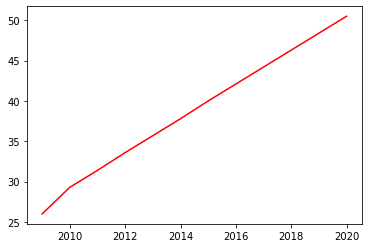

In [23]:
x=df['Year']
y=df['Access to electricity (% of population)']
pl.plot(x,y, c='r')

We see that the relation is mostly linear by visually inspecting the plot. There is a kink at 2010 and data from before 2009 are missing. We decide to use linear extrapolation to fill in the missing data. 

In [24]:
# A 1-D Series with missing external values
x = [0.5, 1, 1.5, 2, 2.5, 3, 20]
y = [np.NaN, 1, np.NaN, 4, np.NaN, 9, np.NaN]
s = pd.Series(y, index=x)
print(s.interpolate(method="linear", limit_direction=None))

0.5     NaN
1.0     1.0
1.5     2.5
2.0     4.0
2.5     6.5
3.0     9.0
20.0    9.0
dtype: float64


In [25]:

x=df['Year']
y=df['Access to electricity (% of population)']
s = pd.Series(y, index=x)
# Expected usage
#print(s.interpolate(method="index", limit_direction="both"))
s

Year
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
2011   NaN
2012   NaN
2013   NaN
2014   NaN
2015   NaN
2016   NaN
2017   NaN
2018   NaN
2019   NaN
2020   NaN
Name: Access to electricity (% of population), dtype: float64

In [26]:
df.interpolate(method ='index',limit_direction='both')
df['Access to electricity (% of population)']

2125     NaN
2126     NaN
2127     NaN
2128     NaN
2129     NaN
2130    26.0
2131    29.3
2132    31.4
2133    33.6
2134    35.7
2135    37.8
2136    40.0
2137    42.1
2138    44.2
2139    46.3
2140    48.4
2141    50.5
Name: Access to electricity (% of population), dtype: float64

In [41]:
df_pr=pd.read_csv('df_pivot3.csv')
df_in=pd.read_csv('df_pivot.csv')
# df_in.columns
# df_pr.columns

df_in.drop(df_in.columns.difference(['Country Name','Year','CO2 emissions (kt)','GDP (current US$)','Population, total']), 1, inplace=True)

df_in.to_csv('CO2 Reduced Data.csv')

df_in

/var/folders/8j/2xw6vvr51bsczxp4p37711lx24bqhv/T/ipykernel_42174/3905826480.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_in.drop(df_in.columns.difference(['Country Name','Year','CO2 emissions (kt)','GDP (current US$)','Population, total']), 1, inplace=True)


,Country Name,Year,CO2 emissions (kt),GDP (current US$),"Population, total"
0,Afghanistan,2004,1292.307,5.224897e+09,23553551.0
1,Afghanistan,2005,1961.711,6.203257e+09,24411191.0
2,Afghanistan,2006,2283.680,6.971758e+09,25442944.0
3,Afghanistan,2007,2847.810,9.747886e+09,25903301.0
4,Afghanistan,2008,4375.640,1.010930e+10,26427199.0
...,...,...,...,...,...
4500,Zimbabwe,2016,10450.200,2.054868e+10,14452704.0
4501,Zimbabwe,2017,9781.000,1.758489e+10,14751101.0
4502,Zimbabwe,2018,11069.900,3.415607e+10,15052184.0
4503,Zimbabwe,2019,10185.300,2.183223e+10,15354608.0
